In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
import matplotlib.pyplot as plt

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Read Data
data_path = "/content/drive/My Drive/Senior Design/Pathology_Project/Student_Version.xlsx"
df = pd.read_excel(data_path)

In [5]:
# Filter out missing samples
df = df.dropna()

In [6]:
# Extract features and target
X = []
y = []

for index, sample in df["sample"].items():
    try:
        data = pd.read_csv(f"/content/drive/My Drive/Senior Design/Pathology_Project/713_1217Spectra_csv_Tranformed/sample{sample}.csv",
                           header=None, names=["Column1", "Column2"])
        X.append(data["Column2"])
        y.append(df["Survival"][index])
    except Exception as e:
        pass

In [7]:
# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

In [13]:
# Normalize input data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [ ]:
# # Bagging Ensemble with Decision Trees
# num_models = 5
# base_models = []

# for _ in range(num_models):
#     base_model = DecisionTreeRegressor()
#     base_model.fit(X_train, y_train)
#     base_models.append(base_model)

# # Combine predictions from all base models
# def ensemble_predict(X):
#     predictions = np.zeros(len(X))
#     for model in base_models:
#         predictions += model.predict(X)
#     return predictions / len(base_models)

# ensemble_predictions = ensemble_predict(X_test)

In [ ]:
# Neural Network Model
tf.random.set_seed(50)

model = tf.keras.Sequential([
    BatchNormalization(input_shape=(X_train.shape[1],)),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),  # Using Adam optimizer for better convergence
              metrics=["mae"])

In [ ]:
# Early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
9/9 [==============================] - 1s 38ms/step - loss: 137.0280 - mae: 137.0280 - val_loss: 129.6134 - val_mae: 129.6134
Epoch 2/100
9/9 [==============================] - 0s 14ms/step - loss: 111.5960 - mae: 111.5960 - val_loss: 103.6445 - val_mae: 103.6445
Epoch 3/100
9/9 [==============================] - 0s 15ms/step - loss: 94.4155 - mae: 94.4155 - val_loss: 89.8009 - val_mae: 89.8009
Epoch 4/100
9/9 [==============================] - 0s 13ms/step - loss: 89.2499 - mae: 89.2499 - val_loss: 87.9089 - val_mae: 87.9089
Epoch 5/100
9/9 [==============================] - 0s 14ms/step - loss: 89.6326 - mae: 89.6326 - val_loss: 87.3761 - val_mae: 87.3761
Epoch 6/100
9/9 [==============================] - 0s 14ms/step - loss: 87.3060 - mae: 87.3060 - val_loss: 88.8448 - val_mae: 88.8448
Epoch 7/100
9/9 [==============================] - 0s 15ms/step - loss: 87.3673 - mae: 87.3673 - val_loss: 86.5805 - val_mae: 86.5805
Epoch 8/100
9/9 [==============================] - 0s 

Text(0.5, 0, 'Epochs')

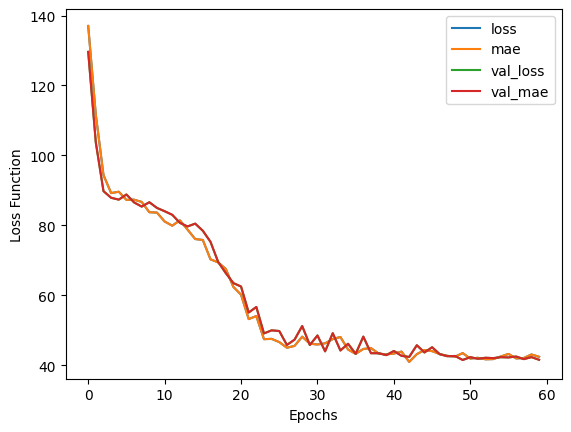

In [ ]:
# Plot training history
pd.DataFrame(history.history).plot()
plt.ylabel("Loss Function")
plt.xlabel("Epochs")

In [ ]:
# Evaluate model on test set
mae = model.evaluate(X_test, y_test)[1]
print("Mean Absolute Error:", mae)

3/3 [==============================] - 0s 7ms/step - loss: 46.8887 - mae: 46.8887
Mean Absolute Error: 46.88872146606445


In [ ]:
# Save the improved model
model.save("/content/drive/My Drive/Bishal/improveAccuracy.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
